<a href="https://colab.research.google.com/github/itsyoru/tumor_classification/blob/main/TumorClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fawady2j","key":"ac60a0a8669864afbe08f78db845443f"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset
!unzip brain-tumor-mri-dataset.zip -d /content/brain_tumor_dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
brain-tumor-mri-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  brain-tumor-mri-dataset.zip
replace /content/brain_tumor_dataset/Testing/glioma/Te-glTr_0000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import os
import matplotlib.pyplot as plt
import random
from PIL import Image

In [ ]:
train_dir = "/content/brain_tumor_dataset/Training"
test_dir = "/content/brain_tumor_dataset/Testing"

import os
trainClasses = os.listdir(train_dir)
testClasses = os.listdir(test_dir)
print("Training Classes:", trainClasses)
print("Testing Classes:", testClasses)

Training Classes: ['glioma', 'meningioma', 'pituitary', 'notumor']
Testing Classes: ['glioma', 'meningioma', 'pituitary', 'notumor']


In [ ]:
IMG_SIZE = (224, 224)

def resize_images_in_directory(directory, size):
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                try:
                    img = Image.open(img_path)

                    if img.mode != 'RGB':
                        img = img.convert('RGB')

                    img = img.resize(size)
                    img.save(img_path)
                except UnidentifiedImageError:
                    print(f"Skipping invalid image: {img_path}")
                    os.remove(img_path)
                except Exception as e:
                    print(f"Error processing {img_path}: {e}")


resize_images_in_directory(train_dir, IMG_SIZE)
resize_images_in_directory(test_dir, IMG_SIZE)

print("Images resized successfully!")


Skipping invalid image: /content/brain_tumor_dataset/Training/notumor/Tr-no_1011.jpg
Skipping invalid image: /content/brain_tumor_dataset/Training/notumor/Tr-no_1012.jpg
Skipping invalid image: /content/brain_tumor_dataset/Training/notumor/Tr-no_1019.jpg
Skipping invalid image: /content/brain_tumor_dataset/Training/notumor/Tr-no_1020.jpg
Images resized successfully!


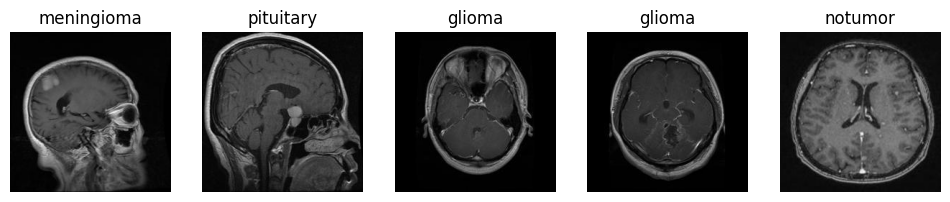

In [ ]:
num_images = 5
plt.figure(figsize=(12, 6))

for i in range(num_images):
    random_class = random.choice(testClasses)
    class_path = os.path.join(train_dir, random_class)

    random_image = random.choice(os.listdir(class_path))
    image_path = os.path.join(class_path, random_image)

    img = Image.open(image_path)

    plt.subplot(1, num_images, i+1)
    plt.imshow(img)
    plt.title(random_class)
    plt.axis("off")

plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [ ]:
from torchvision import datasets
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

In [ ]:
from torch.utils.data import DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
print(f"Training dataset size: {len(train_dataset)}")
print(f"Testing dataset size: {len(test_dataset)}")


Training dataset size: 5708
Testing dataset size: 1311
